# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [101]:
import pandas as pd
import numpy as np
import math

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (20., 13.)})
sns.set_style('whitegrid')

from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'


# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [8]:
temp = pd.read_csv(r"..\your-code\Temp_States.csv")

#### Print `temp`

In [9]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [10]:
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [77]:
nyc = temp[temp["State"] == "New York"]
nyc

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [14]:
nyc["Temperature"].mean()

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [76]:
temp15 = temp[temp["Temperature"] > 15].reset_index()
temp15

,index,City,State,Temperature
0,0,NYC,New York,19.444444
1,3,Hartford,Connecticut,17.222222
2,5,Treton,New Jersey,22.222222
3,6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [20]:
temp15["City"]

0         NYC
1    Hartford
2      Treton
3      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [75]:
temp15_20 = temp[(temp["Temperature"] > 15) & (temp["Temperature"] < 20)].reset_index()
temp15_20

,index,City,State,Temperature
0,0,NYC,New York,19.444444
1,3,Hartford,Connecticut,17.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [38]:
temp.groupby("State")["Temperature"].describe()[["mean", "std"]]

,mean,std
State,,
Connecticut,15.833333,1.964186
New Jersey,21.111111,1.571348
New York,10.740741,8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [40]:
employee = pd.read_csv(r"..\your-code\employee.csv")
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [41]:
employee.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

Text(0.5, 0, 'Salaries')

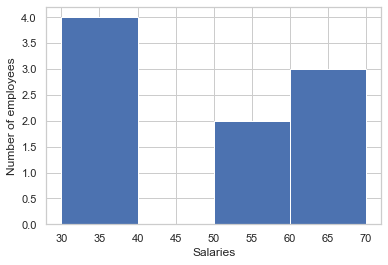

In [69]:
plt.hist(employee["Salary"], density=False, bins=4)  #density=true percentage
plt.ylabel('Number of employees')
plt.xlabel('Salaries')

Text(0.5, 0, 'Years working for the company')

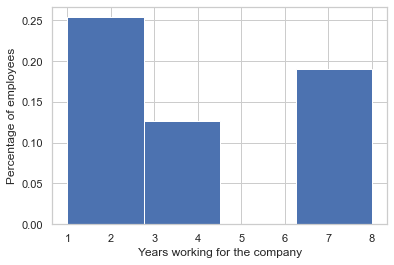

In [68]:
plt.hist(employee["Years"], density=True, bins=4)  #density=true percentage
plt.ylabel('Percentage of employees')
plt.xlabel('Years working for the company')

#### What's the average salary in this company?

In [70]:
employee["Salary"].mean()


48.888888888888886

#### What's the highest salary?

In [71]:
employee["Salary"].max()


70

#### What's the lowest salary?

In [72]:
employee["Salary"].min()


30

#### Who are the employees with the lowest salary?

In [74]:
employee[employee["Salary"] == employee["Salary"].min()]


,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [78]:
employee[employee["Name"] == "David"]

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [80]:
employee[employee["Name"] == "David"]["Salary"]

2    30
Name: Salary, dtype: int64


#### Print all the rows where job title is associate

In [81]:
employee[employee["Title"] == "associate"]

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [82]:
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [86]:
employee[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [87]:
employee[(employee["Title"] == "associate") & (employee["Salary"] > 55)]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [88]:
employee.groupby("Years")["Salary"].mean()

Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64

####  What is the average Salary per title?

In [89]:
employee.groupby("Title")["Salary"].mean()

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

<AxesSubplot: xlabel='Salary', ylabel='Title'>

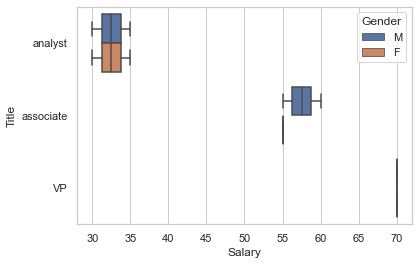

In [102]:
sns.boxplot(employee, y = "Title", x = "Salary", hue = "Gender")

In [103]:
employee["Salary"].quantile(.25)

35.0

In [104]:
employee["Salary"].quantile(.75)

60.0

#### Is the mean salary per gender different?

In [105]:
employee.groupby("Gender")["Salary"].mean()

Gender
F    47.5
M    50.0
Name: Salary, dtype: float64

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [194]:
employee.groupby("Department")["Years"].describe()[["min", "max", "mean"]]

,min,max,mean
Department,,,
HR,2.0,8.0,4.666667
IT,1.0,8.0,4.500000
Sales,2.0,3.0,2.500000


In [195]:
employee.groupby("Department")["Salary"].describe()[["min", "max", "mean"]]

,min,max,mean
Department,,,
HR,30.0,70.0,45.00
IT,30.0,70.0,48.75
Sales,55.0,55.0,55.00


In [199]:
employee.groupby("Department").describe().T

Department           HR         IT      Sales
Years  count   3.000000   4.000000   2.000000
       mean    4.666667   4.500000   2.500000
       std     3.055050   3.511885   0.707107
       min     2.000000   1.000000   2.000000
       25%     3.000000   1.750000   2.250000
       50%     4.000000   4.500000   2.500000
       75%     6.000000   7.250000   2.750000
       max     8.000000   8.000000   3.000000
Salary count   3.000000   4.000000   2.000000
       mean   45.000000  48.750000  55.000000
       std    21.794495  19.311050   0.000000
       min    30.000000  30.000000  55.000000
       25%    32.500000  33.750000  55.000000
       50%    35.000000  47.500000  55.000000
       75%    52.500000  62.500000  55.000000
       max    70.000000  70.000000  55.000000

In [200]:
#another possible solution

employee.groupby('Department', as_index=False).agg({'Years':[np.min, np.mean, np.max],
                                                    'Salary':[np.min, np.mean, np.max]})

Department Years                Salary            
              amin      mean amax   amin   mean amax
0         HR     2  4.666667    8     30  45.00   70
1         IT     1  4.500000    8     30  48.75   70
2      Sales     2  2.500000    3     55  55.00   55

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [32]:
# your answer here

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [120]:
orders = pd.read_csv(r"..\your-code\orders.csv")
orders.drop(columns = "Unnamed: 0", inplace=True)

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [121]:
orders.dtypes

InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [122]:
orders.describe()

,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

In [123]:
orders["UnitPrice"].mean()

3.1161744805540756

#### What were the highest and lowest purchase prices? 

In [124]:
orders["UnitPrice"].max()

8142.75

In [125]:
orders["UnitPrice"].min()

0.0

#### Select all the customers we have in Spain

In [126]:
orders.sample()

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
306459,572858,21181,2011,10,3,12,please one person metal sign,4,2011-10-26 12:36:00,2.1,13571,United Kingdom,8.4


In [132]:
orders_es = orders[orders["Country"] == "Spain"]
orders_es.sample()

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
307012,572886,46000S,2011,10,3,13,polyester filler pad 40x40cm,5,2011-10-26 13:46:00,1.45,12448,Spain,7.25


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [136]:
orders_es["CustomerID"].value_counts().sum()

2485

#### Select all the customers who have bought more than 50 items ?

In [ ]:
qty_50 = orders[orders['Quantity'] > 50]
qty_50.groupby("CustomerID").apply(display).head(1)

#### Select orders from Spain that are above 50 items

In [ ]:
qty_50 = orders_es[orders_es['Quantity'] > 50]
qty_50.groupby("CustomerID").apply(display)

#### Select all free orders

In [160]:
free_orders = orders[orders['amount_spent'] == 0]
free_orders.sample()


,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
53788,543599,84535B,2011,2,4,13,fairy cakes notebook a6 size,16,2011-02-10 13:08:00,0.0,17560,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [169]:
lunchbags = orders[orders["Description"].str.contains(r"lunch bag", regex=True)]
lunchbags.sample()

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
305500,572726,22382,2011,10,2,15,lunch bag spaceboy design,4,2011-10-25 15:19:00,1.65,16056,United Kingdom,6.6


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [171]:
lunchbags[lunchbags['year']==2011].sample()

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
74867,546108,22384,2011,3,3,12,lunch bag pink polkadot,4,2011-03-09 12:35:00,1.65,15529,United Kingdom,6.6


#### Show the frequency distribution of the amount spent in Spain.

Text(0.5, 0, 'Money spent')

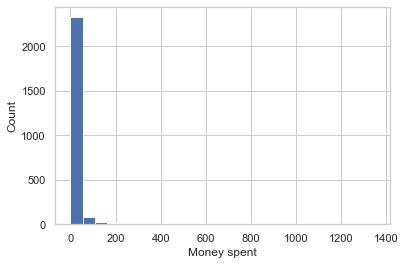

In [179]:
plt.hist(orders_es["amount_spent"], density=False, bins=25)  
plt.ylabel('Count')
plt.xlabel('Money spent')

#### Select all orders made in the month of August

In [180]:
orders[orders['month']==8].sample()

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
223384,564565,22423,2011,8,5,10,regency cakestand 3 tier,4,2011-08-26 10:50:00,12.75,14911,EIRE,51.0


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [188]:
orders[orders['month']==8].value_counts().groupby("Country").sum()

Country
Australia            107
Austria               88
Belgium              194
Canada                 5
Channel Islands      140
Denmark               16
EIRE                 593
Finland               61
France               569
Germany              795
Iceland               22
Israel               171
Italy                 95
Malta                 55
Netherlands          280
Norway                77
Poland                17
Portugal              41
Spain                252
Sweden                40
Switzerland          267
United Kingdom     23105
Unspecified           23
dtype: int64

#### What's the  average amount of money spent by country

In [189]:
orders.groupby("Country")['amount_spent'].mean()

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### What's the most expensive item?

In [190]:
orders['UnitPrice'].max()

8142.75

#### What was the average amount spent per year ?

In [192]:
orders.groupby("year")['amount_spent'].mean()

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64